# DLBDSEDAV01 – Exploratory Data Analysis (EDA) and Visualization

## Task 1: Visually Exploring a Dataset

### Life Expectancy Dataset – EDA Project Overview

This project uses Exploratory Data Analysis (EDA) to examine the Life Expectancy dataset. The goal is to identify trends, patterns, and relationships between life expectancy and various socio-economic and health factors using statistical techniques and visualizations.

---

## 1. Dataset Overview

- **Source**: User-provided 'Life Expectancy Data.csv'

### Main Columns (Numerical Features for Analysis):
- `Life expectancy` (Target variable for primary analysis)
- `Adult Mortality`
- `infant deaths`
- `Alcohol`
- `percentage expenditure`
- `Hepatitis B`
- `Measles`
- `BMI`
- `under-five deaths`
- `Polio`
- `Total expenditure`
- `Diphtheria`
- `HIV/AIDS`
- `GDP`
- `Population`
- `thinness 1-19 years`
- `thinness 5-9 years`
- `Income composition of resources`
- `Schooling`


## 2. Data Preparation and Cleaning

This section involves loading the dataset, inspecting its initial structure, and handling missing values to ensure the data is suitable for analysis.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
# Display concise summary of the DataFrame
print("\nConcise summary of the DataFrame:")
df.info()


Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null 

### Handling Missing Values

The initial inspection revealed several columns with missing values. For the purpose of this exploratory analysis, missing numerical values are imputed using the mean of their respective columns.


In [25]:
#Missing values
print("\nMissing values before imputation:")
df.isnull().sum()


Missing values before imputation:


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [26]:
# --- FIX: Robustly Clean column names ---
# Strip leading/trailing whitespace and replace multiple internal spaces with single space
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

print("\nColumns after robust cleaning:")
print(df.columns.to_list())

# --- Data Preparation and Cleaning ---
# Fill missing numerical values with the mean of their respective column
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())

print("\nMissing values after imputation:")
df.isnull().sum()


Columns after robust cleaning:
['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

Missing values after imputation:


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


## 3. Describing Location and Variability (Central Tendency and Spread)

To understand the core characteristics of the numerical features, we calculate descriptive statistics for all of them. This provides insights into their central tendency (mean, median), and variability (standard deviation, quartiles, range).

In [27]:
print("--- Descriptive Statistics for All Numerical Features ---")
# Select only numerical columns for description
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

--- Descriptive Statistics for All Numerical Features ---


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Interpretation of Descriptive Statistics:**

The table above provides key summary statistics for all numerical features in the dataset:

- Count: Indicates the number of non-null entries for each column, confirming successful imputation of missing values.
- Mean: The arithmetic average of the values. For Life expectancy, the mean is approximately 69.22 years.
- Std (Standard Deviation): Measures the dispersion of data points around the mean. A higher standard deviation indicates greater variability. For Life expectancy, a standard deviation of 9.51 suggests a moderate spread.
- Min/Max: The minimum and maximum values, showing the full range of the data.
- 25%, 50% (Median), 75%: These are the quartiles. The 50th percentile is the median. Comparing the mean and median can give an indication of skewness. For instance, if the mean is notably different from the median, the distribution might be skewed.

When to use the Median instead of the Arithmetic Mean:
The median is often preferred over the arithmetic mean when the data distribution is skewed or contains outliers. In such cases, extreme values can significantly pull the mean towards them, making it less representative of the 'typical' value. The median, being the middle value, is more robust to outliers and provides a better measure of central tendency for skewed distributions. For example, Population and GDP show a large difference between mean and median, suggesting significant right-skewness due to some very large values.

## 4. Describing Distributions (Visualizations)

To visually explore the distribution shape of each numerical feature, we use histograms and Kernel Density Estimate (KDE) plots. For a more detailed look at 'Life expectancy' and a selection of other highly relevant features, we also provide box-whisker plots and violin plots.


--- Visualizing Distributions for All Relevant Numerical Features ---


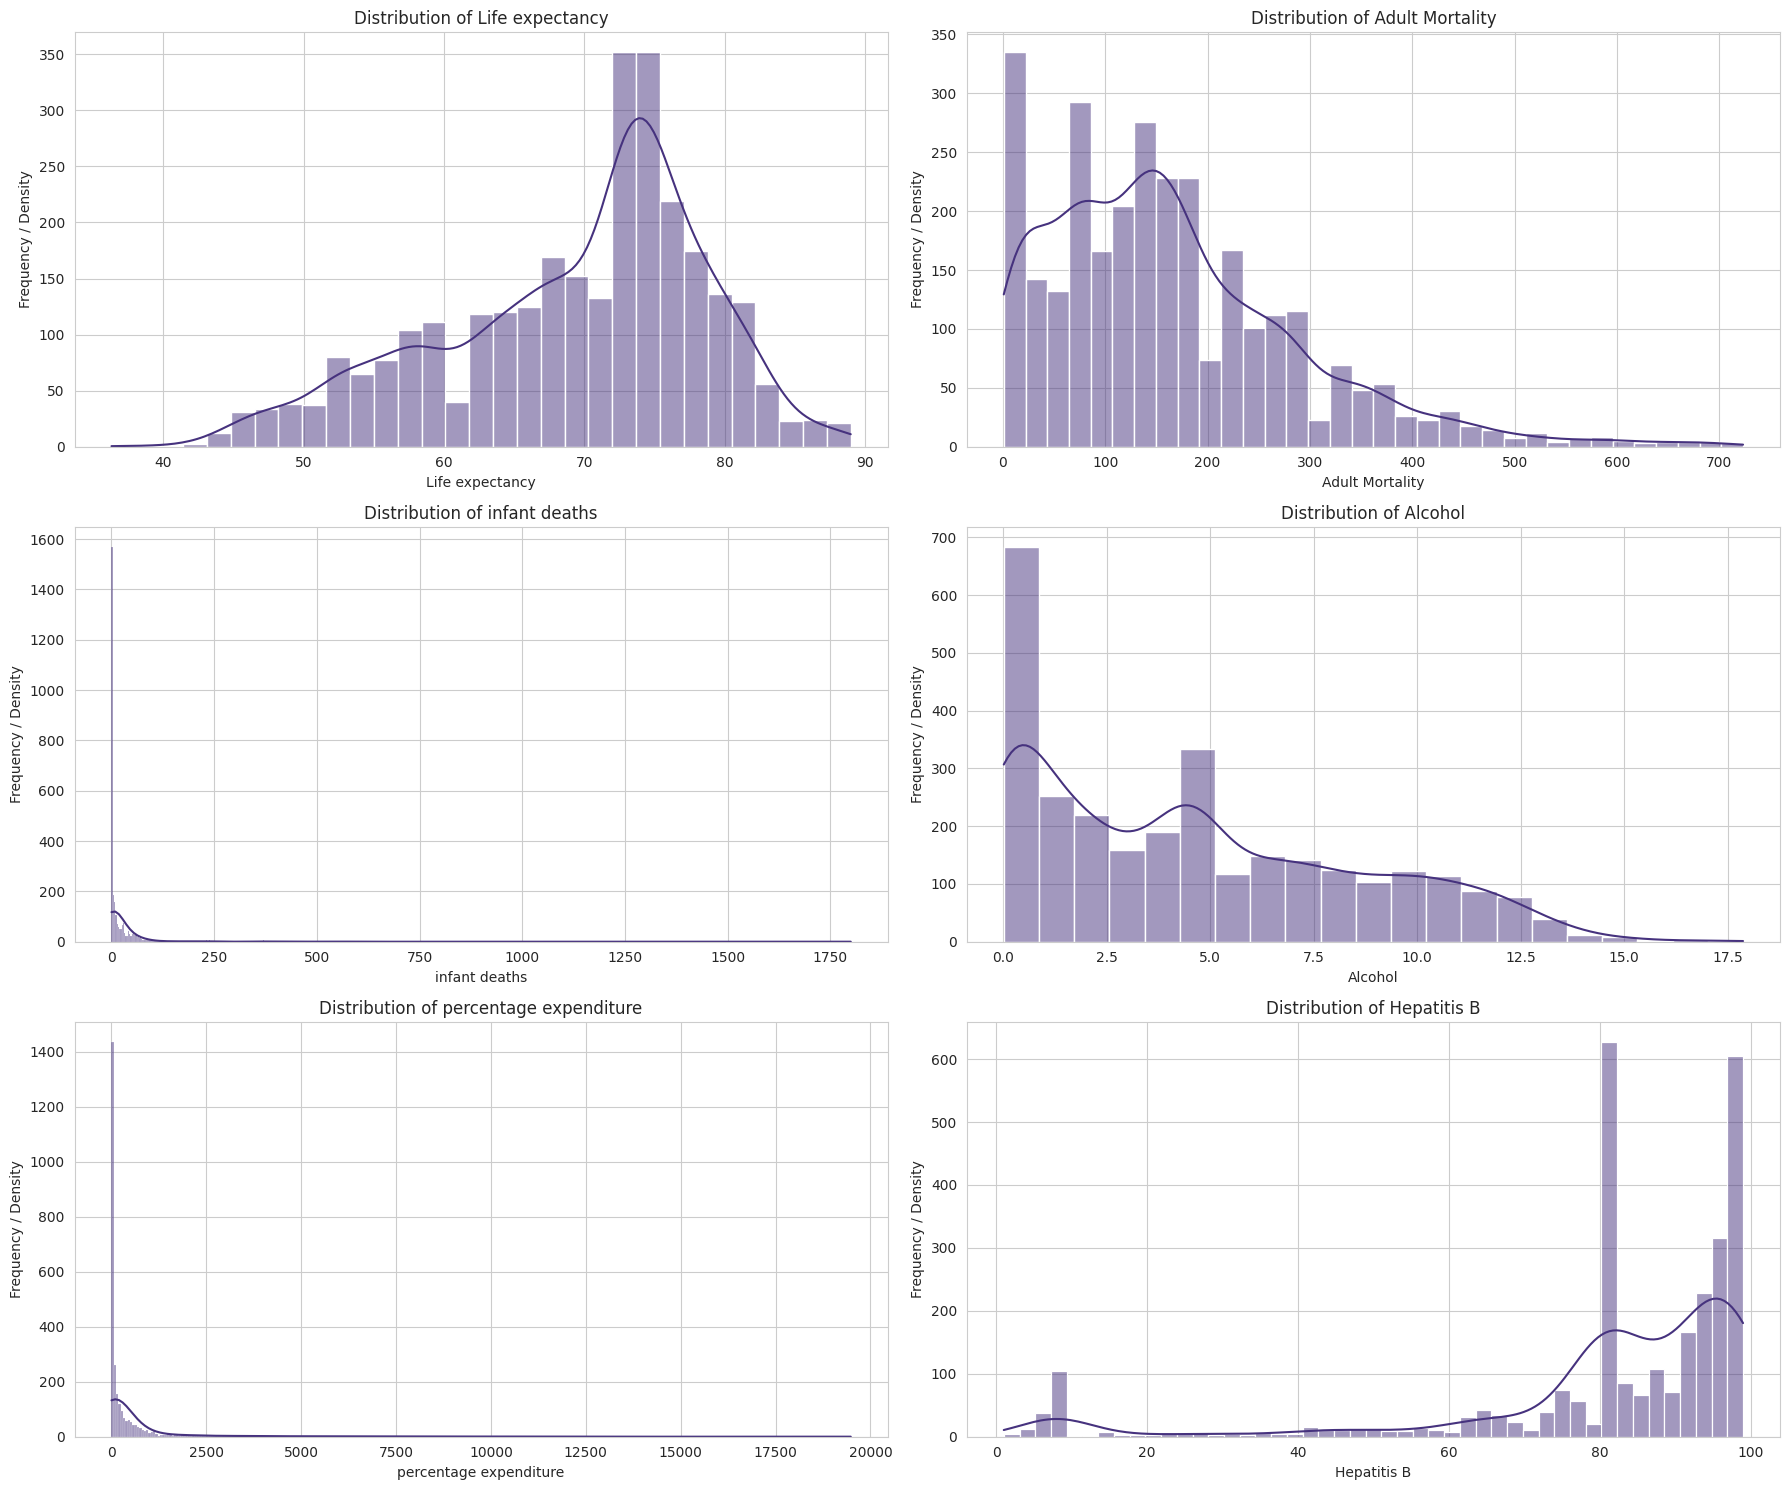

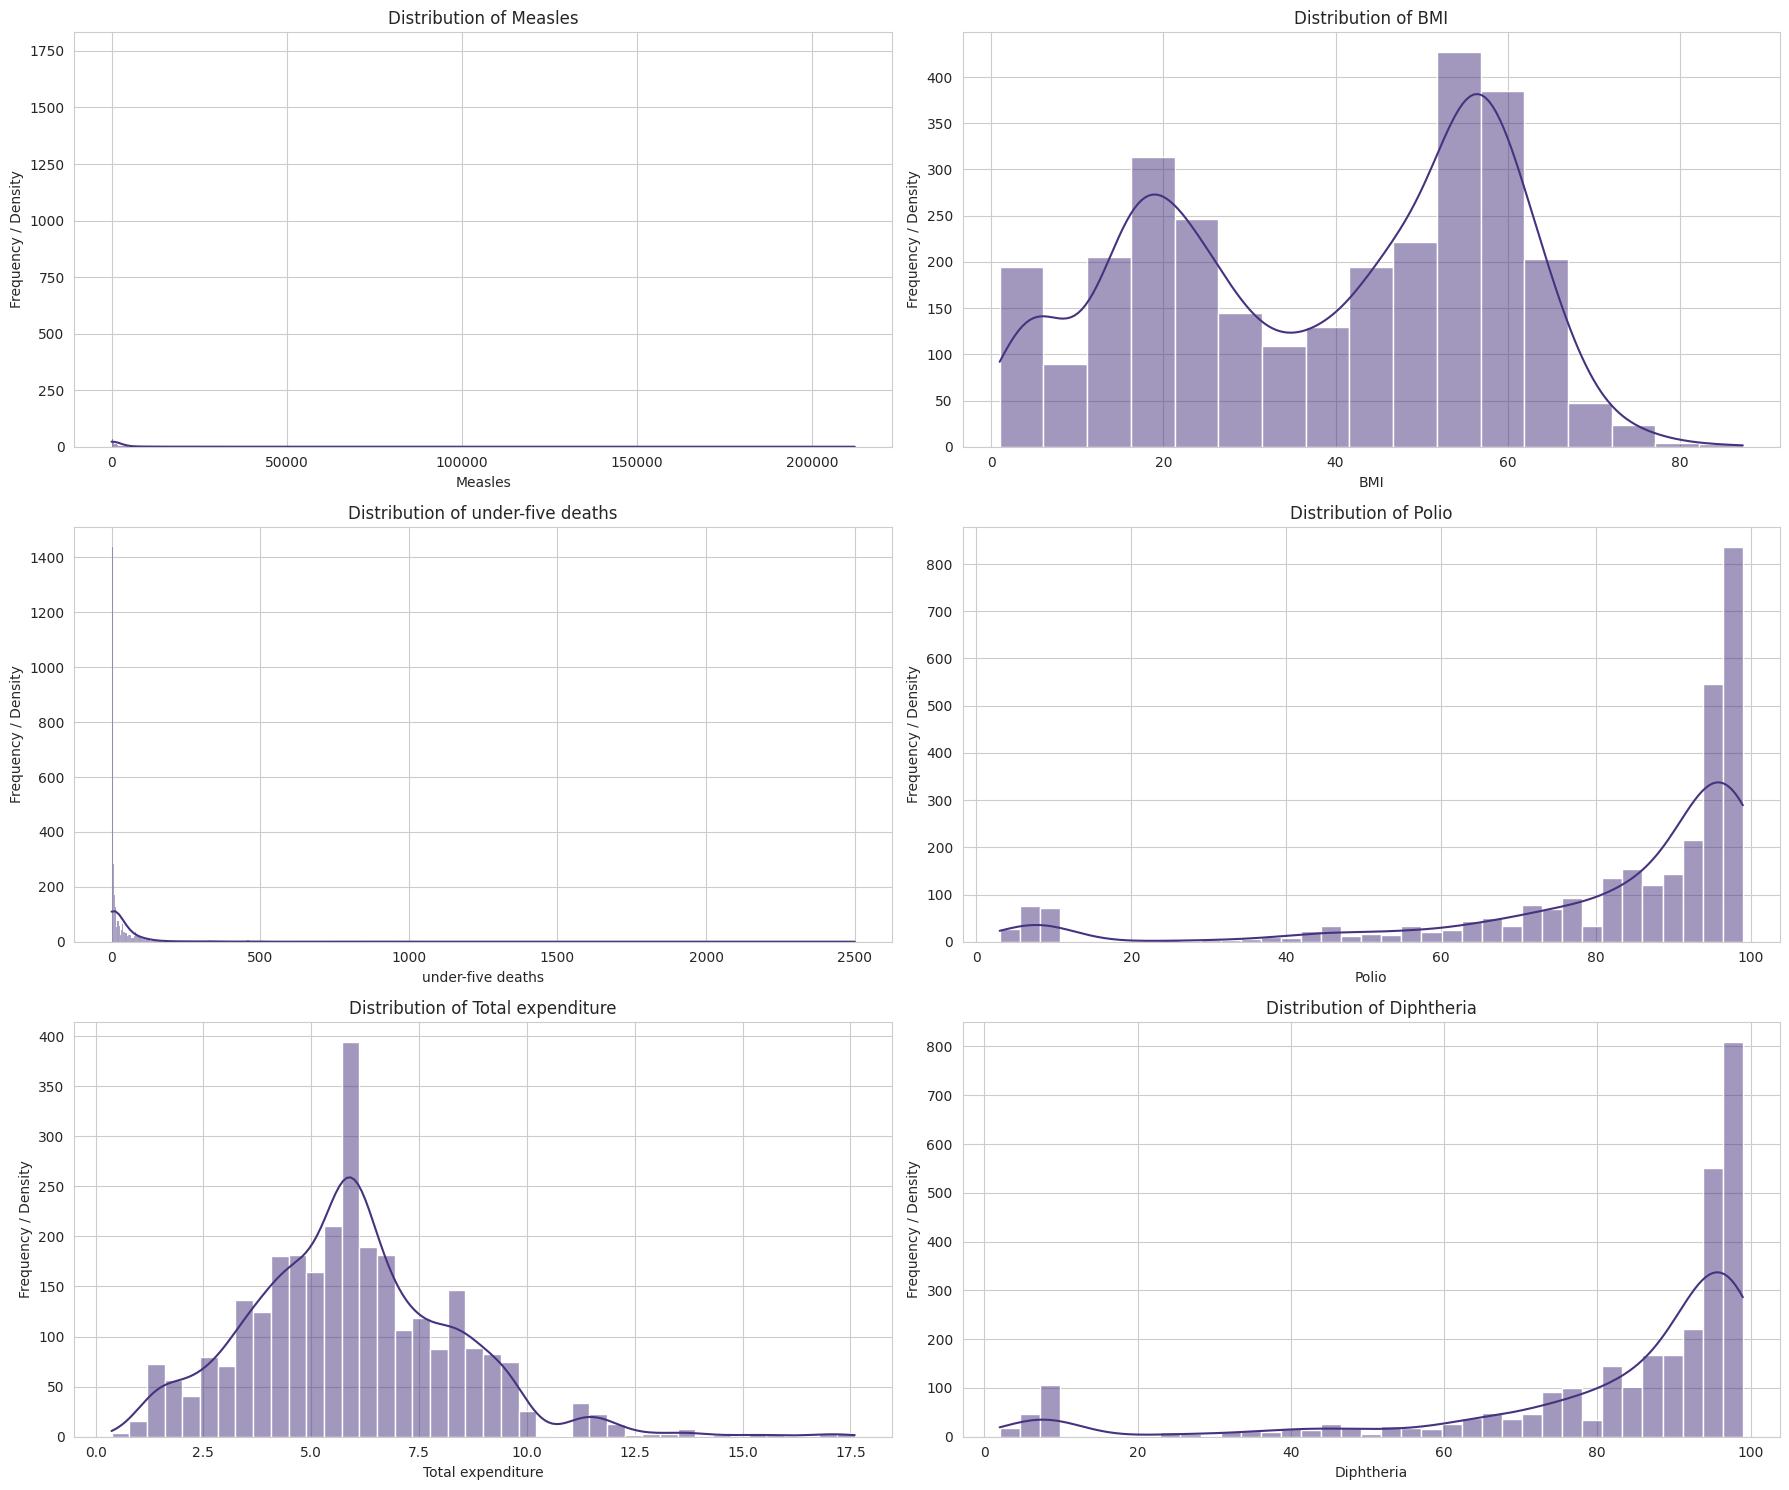

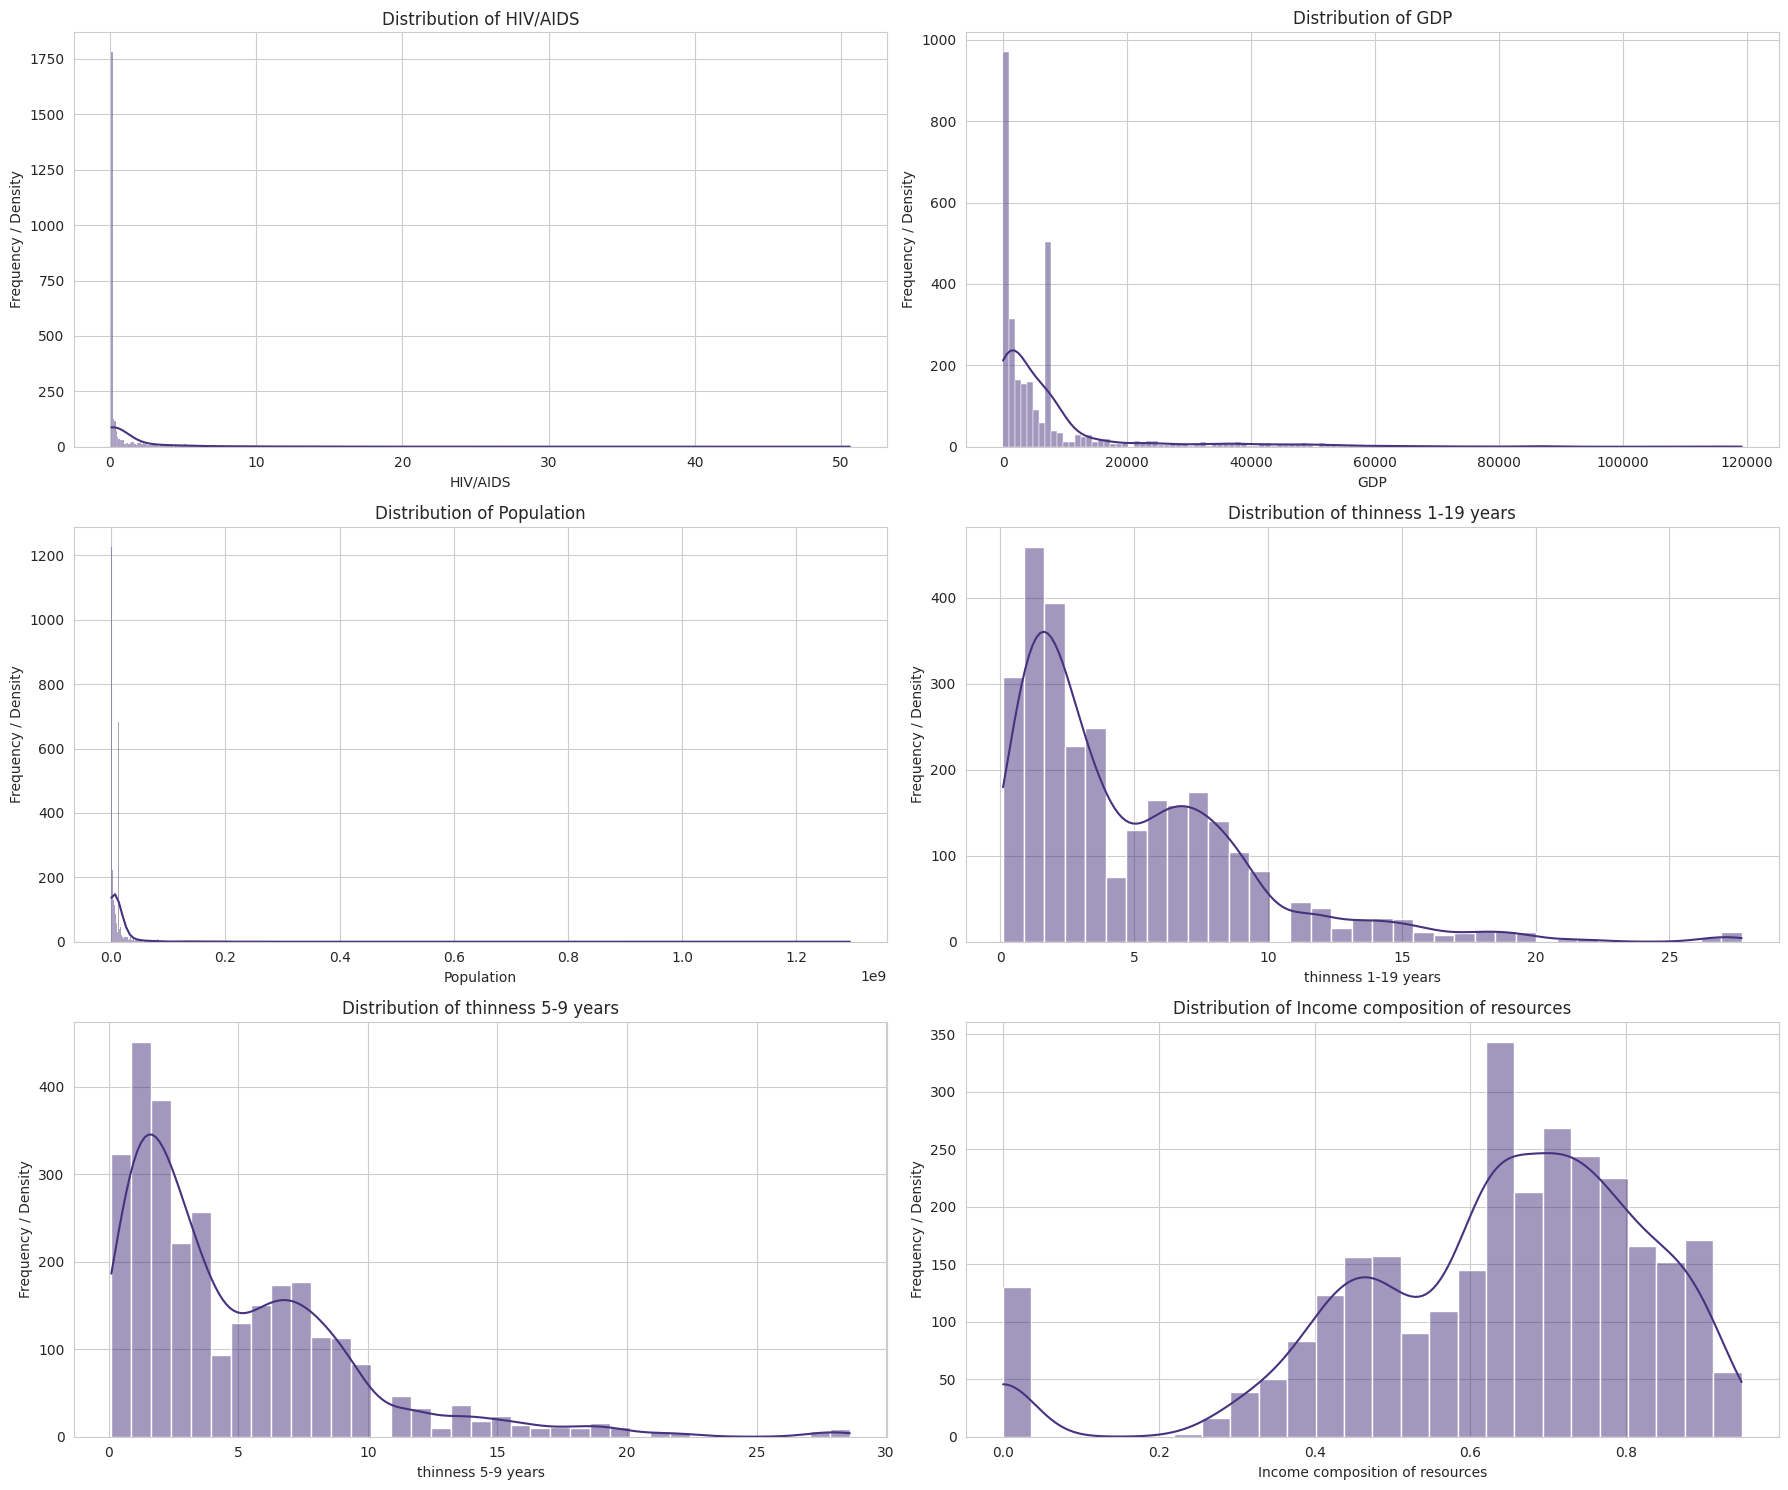

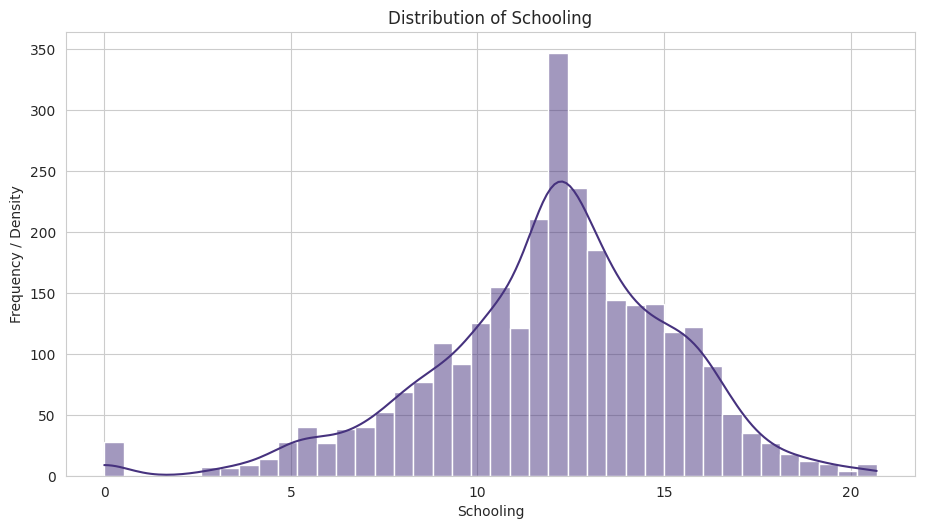

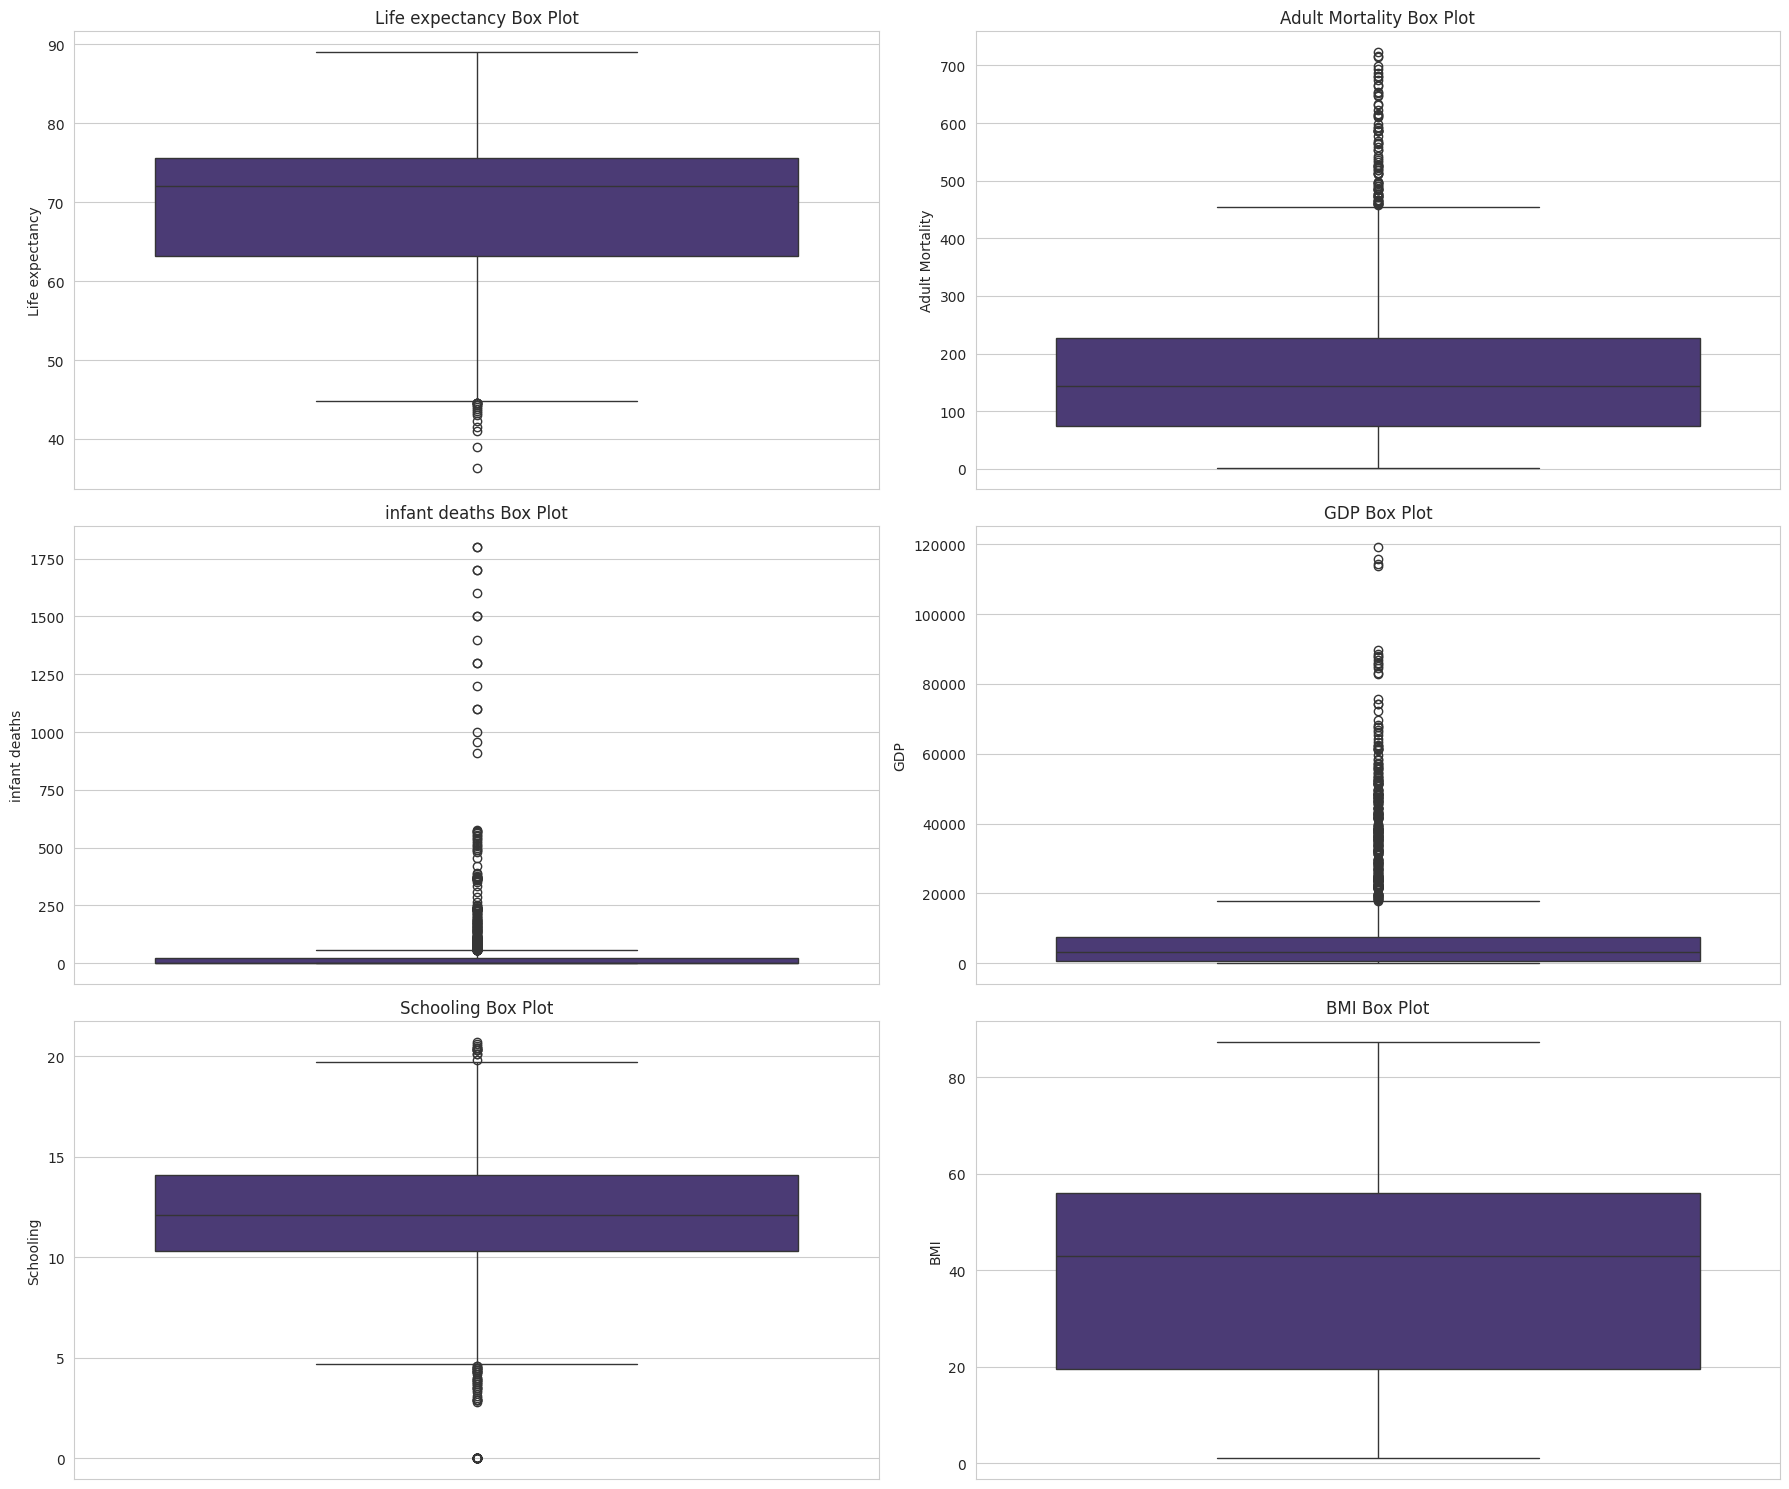

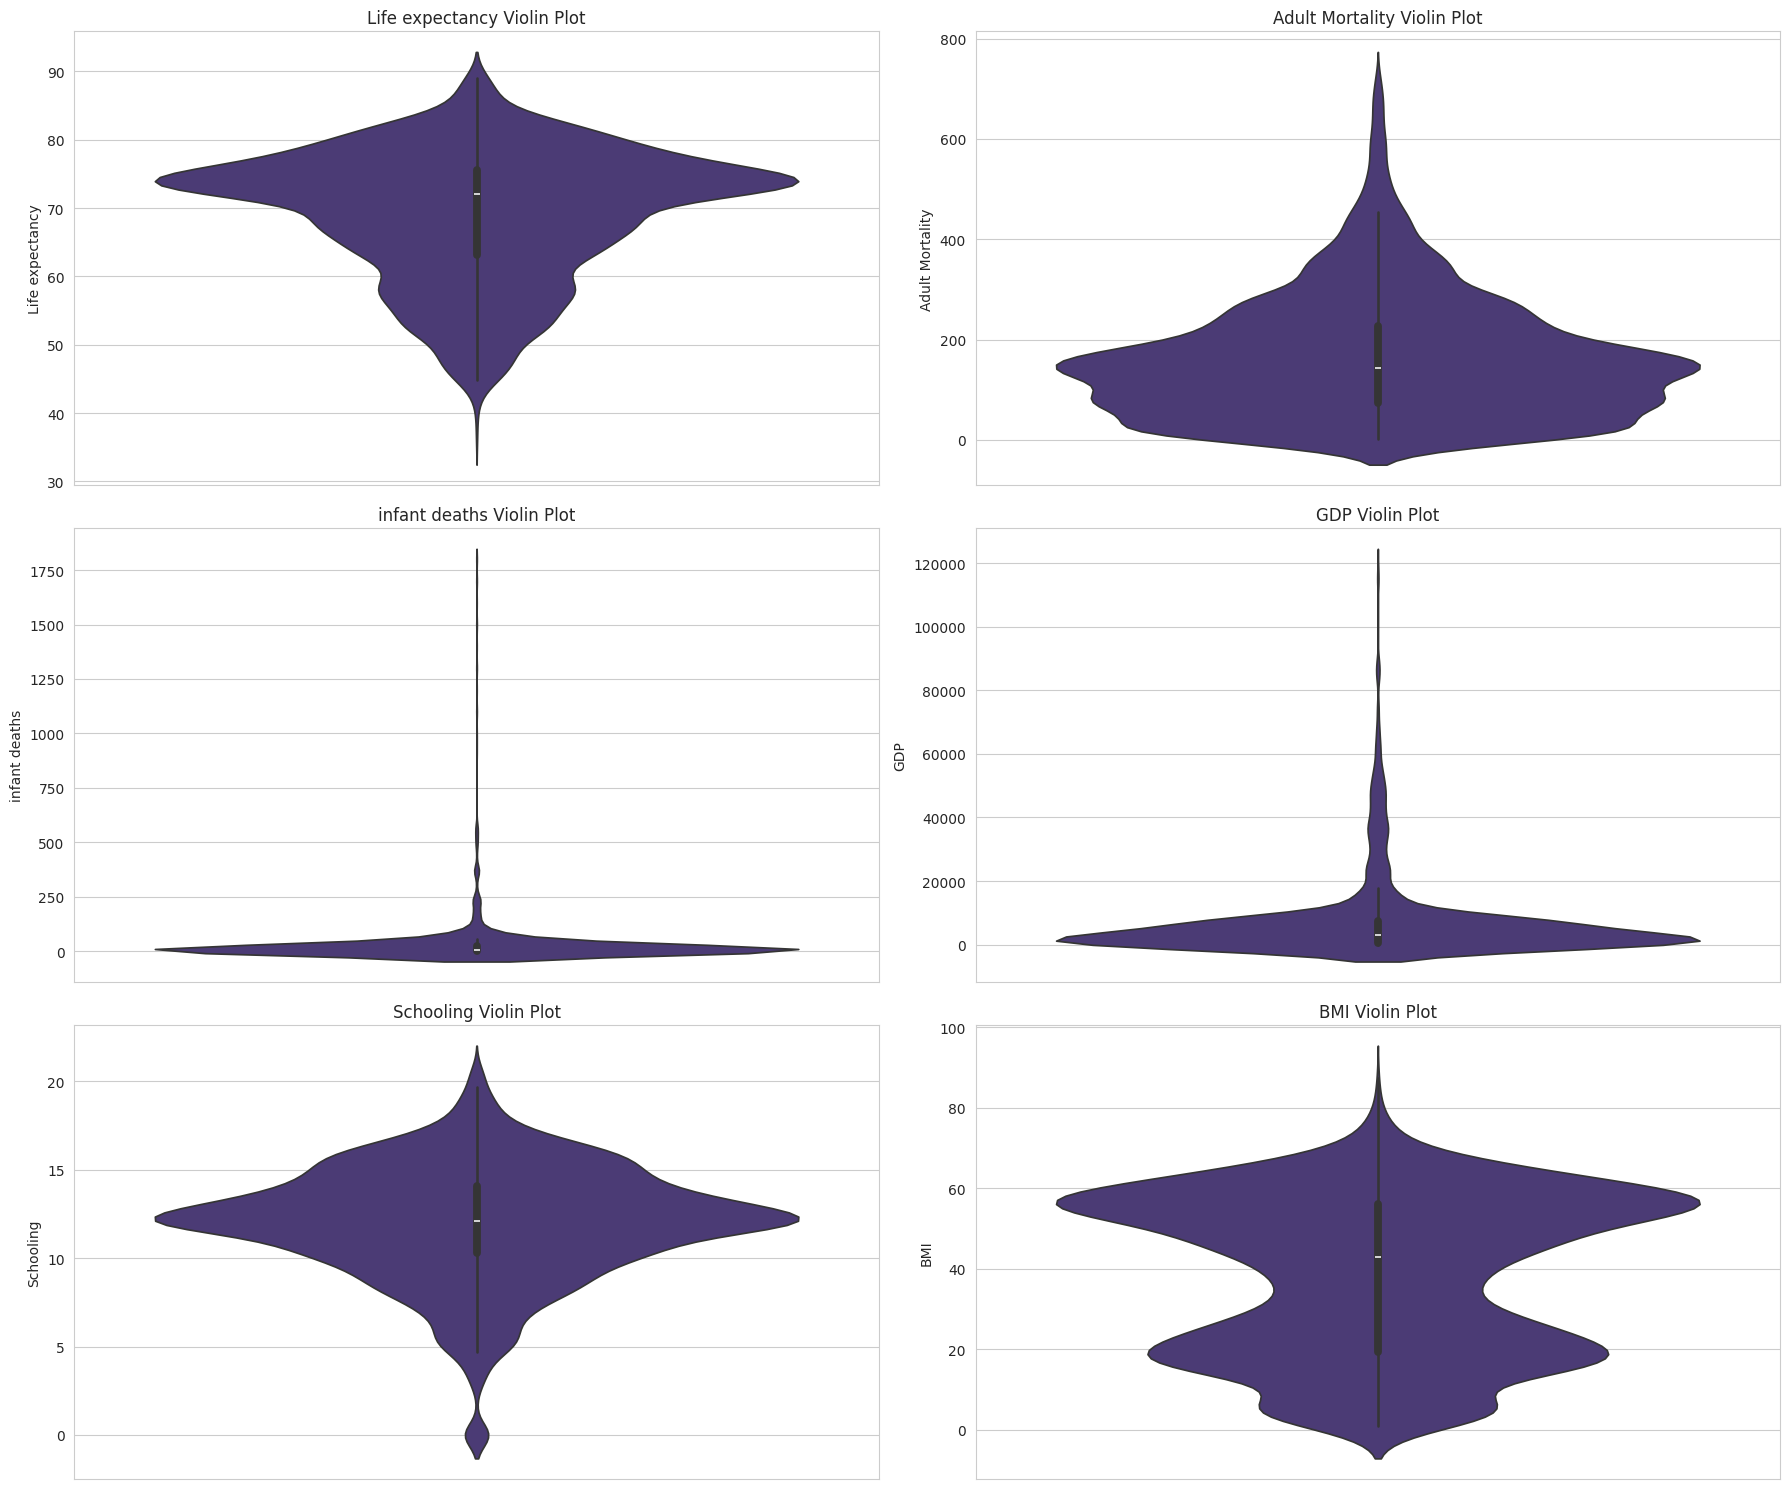

In [32]:
sns.set_style("whitegrid")
sns.set_palette("viridis") # Using a sequential color ramp

print("\n--- Visualizing Distributions for All Relevant Numerical Features ---")

# List of all numerical features to analyze
all_numerical_features = [
    'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
    'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
    'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
    'thinness 5-9 years', 'Income composition of resources', 'Schooling'
]

# Create histograms and KDE plots for each numerical feature
# Organize plots into multiple figures to avoid overcrowding
num_plots_per_fig = 6
num_figures = (len(all_numerical_features) + num_plots_per_fig - 1) // num_plots_per_fig

for i in range(num_figures):
    plt.figure(figsize=(18, 15))
    start_idx = i * num_plots_per_fig
    end_idx = min((i + 1) * num_plots_per_fig, len(all_numerical_features))

    for j, col in enumerate(all_numerical_features[start_idx:end_idx]):
        plt.subplot(3, 2, j + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency / Density')
    plt.tight_layout()
    plt.savefig(f'distributions_part_{i+1}.png')
    plt.show()

# Create Box-Whisker and Violin Plots for selected highly relevant features (to avoid too many plots)
# Focusing on 'Life expectancy', 'Adult Mortality', 'infant deaths', 'GDP', 'Schooling', 'BMI'
selected_features_for_box_violin = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'GDP', 'Schooling', 'BMI']

# Filter this list to ensure all selected features exist after cleaning
selected_features_for_box_violin = [feature for feature in selected_features_for_box_violin if feature in df.columns]

plt.figure(figsize=(18, 15))
for i, col in enumerate(selected_features_for_box_violin):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Box Plot')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('selected_features_boxplots.png')
plt.show()

plt.figure(figsize=(18, 15))
for i, col in enumerate(selected_features_for_box_violin):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(y=df[col])
    plt.title(f'{col} Violin Plot')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('selected_features_violinplots.png')
plt.show()

**Understanding the Normal Distribution:**

From the histograms, KDE plots, box plots, and violin plots, we can observe the shape of each feature's distribution. Many real-world datasets, like this one, do not perfectly follow a normal (bell-shaped, symmetric) distribution. For example:

- Life expectancy: Appears somewhat negatively skewed (left-skewed), with a tail extending towards lower values and a concentration at higher life expectancies.
- Infant deaths, Measles, under-five deaths, HIV/AIDS, Population: Show strong right-skewness, with a large number of countries having very low values and a few outliers with extremely high counts.
- Alcohol, BMI, Schooling, Income composition of resources: Tend to show more symmetrical or slightly skewed distributions.

Recognizing these deviations from normality is important as many parametric statistical tests assume normality. For skewed data, transformations or non-parametric tests might be more appropriate. The area under the Probability Density Function (KDE plot) can be used to determine the probability of a value falling within a certain range.

## 5. Describing Covariance and Correlation

Covariance and correlation are used to quantify the linear relationship between two numerical variables.


In [30]:
print("\n--- Exploring Covariance and Correlation for All Numerical Features ---")

# Covariance and Correlation between 'Life expectancy' and 'GDP'
cov_le_gdp = df['Life expectancy'].cov(df['GDP'])
corr_le_gdp = df['Life expectancy'].corr(df['GDP'])

print(f"Covariance between Life Expectancy and GDP: {cov_le_gdp:.2f}")
print(f"Correlation between Life Expectancy and GDP: {corr_le_gdp:.2f}")


--- Exploring Covariance and Correlation for All Numerical Features ---
Covariance between Life Expectancy and GDP: 53768.57
Correlation between Life Expectancy and GDP: 0.43


**Explanation of the Correlation Coefficient:**

The correlation coefficient expresses the strength and direction of a linear relationship between two variables. It ranges from -1 to +1:

- **+1** indicates a perfect positive linear relationship.  
- **-1** indicates a perfect negative linear relationship.  
- **0** indicates no linear relationship.

A value of **0.43** for Life Expectancy and GDP suggests a **moderate positive linear relationship**. This implies that as GDP tends to increase, life expectancy also tends to increase, but the relationship is not extremely strong or perfectly linear.


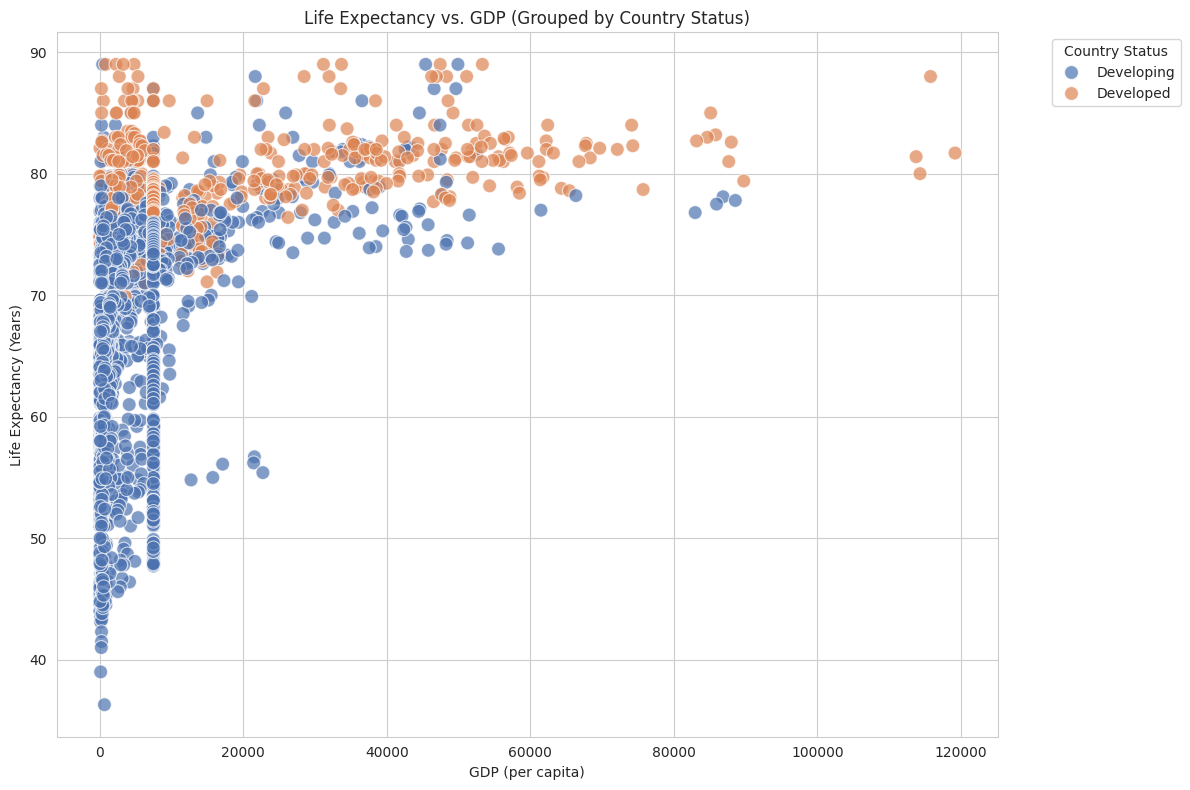

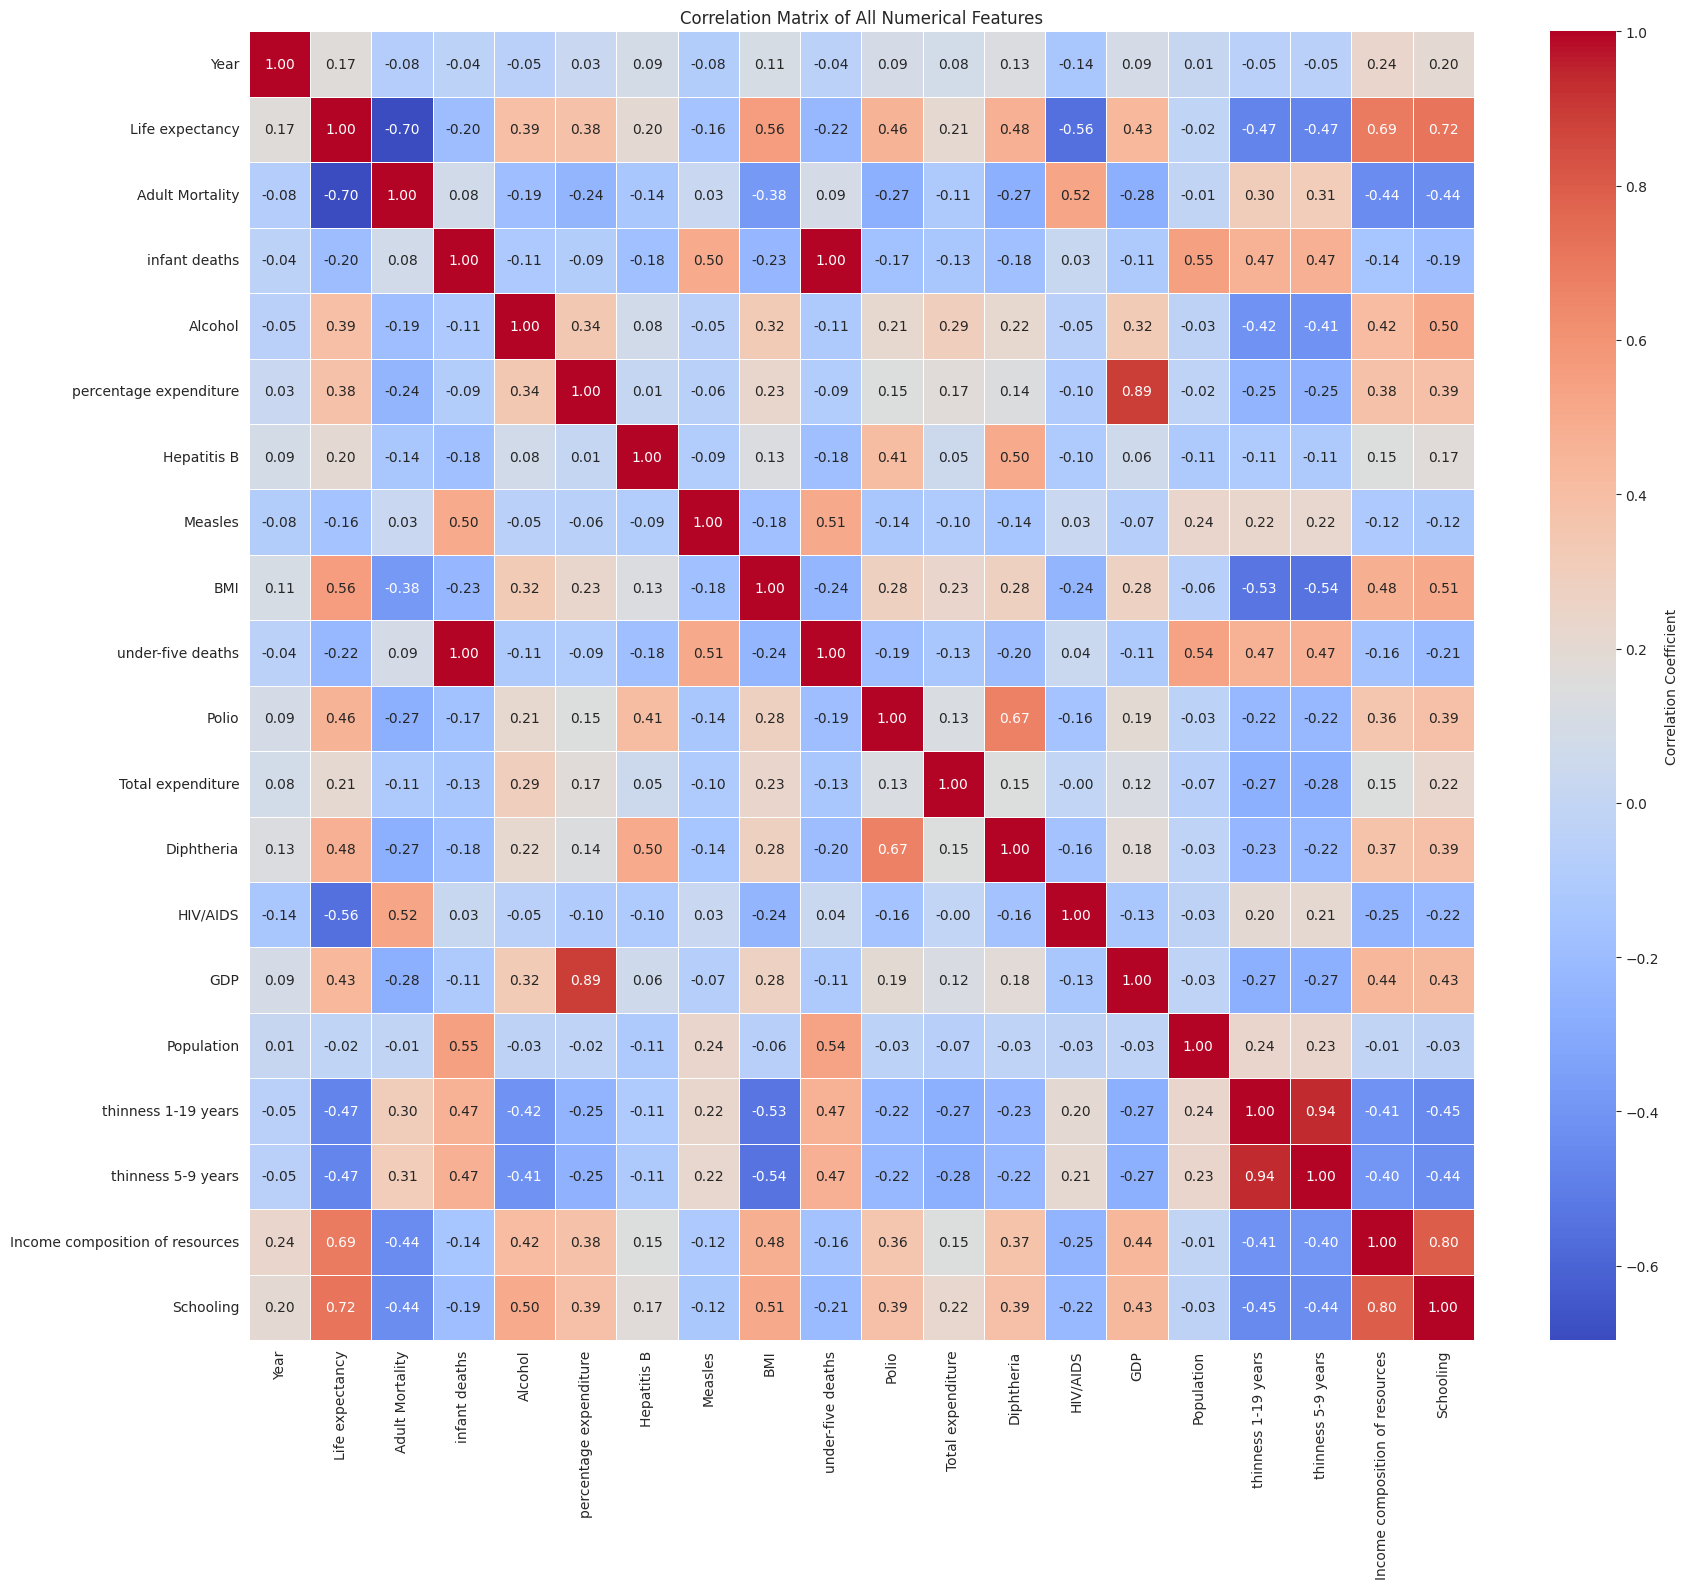

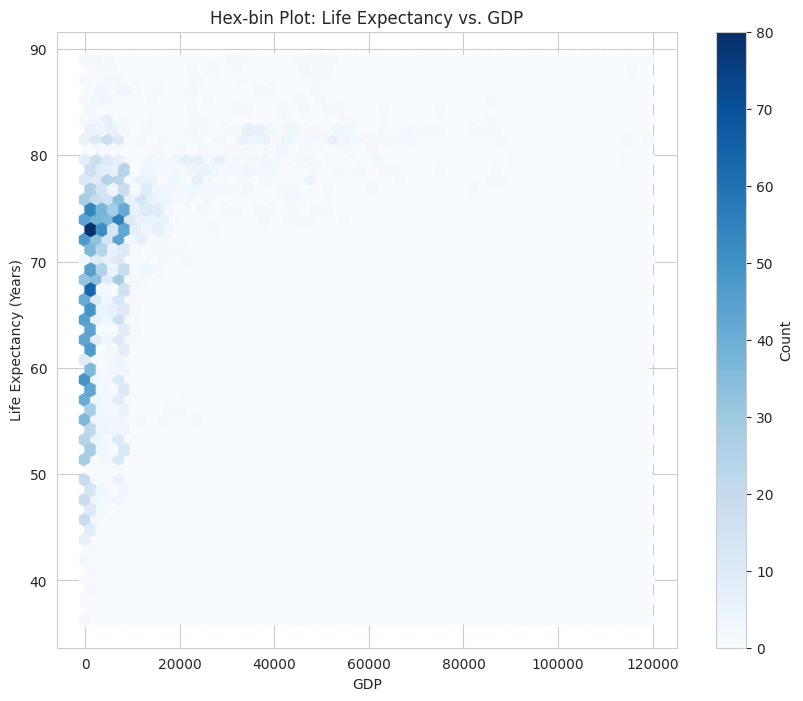

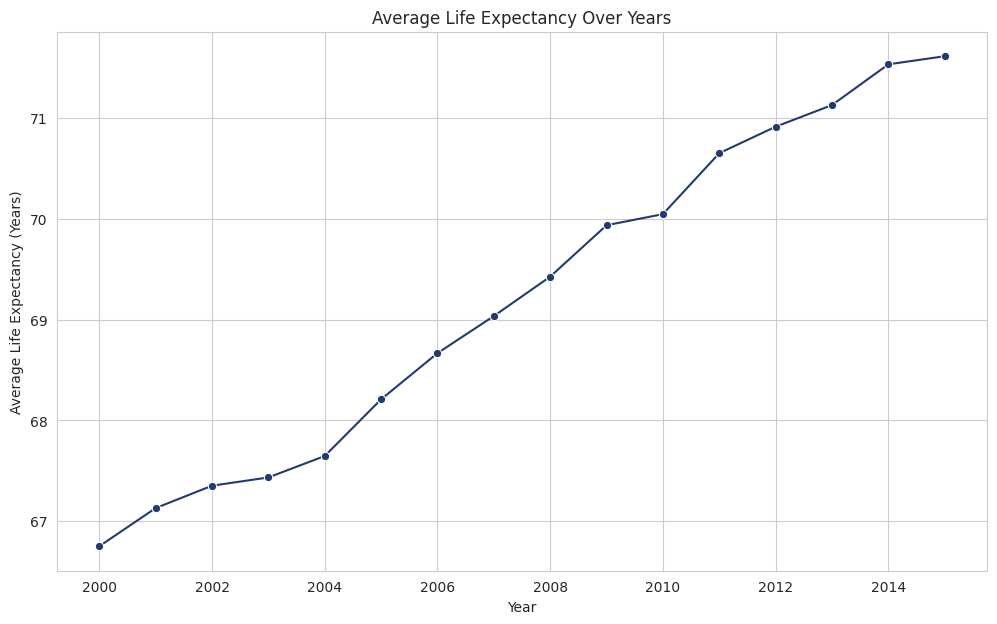

In [31]:
# Visualizations for Relationships

# Scatter Plot: Life expectancy vs. GDP, grouped by 'Status'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GDP', y='Life expectancy', data=df, hue='Status', palette='deep', alpha=0.7, s=100)
plt.title('Life Expectancy vs. GDP (Grouped by Country Status)')
plt.xlabel('GDP (per capita)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Country Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('life_expectancy_gdp_scatterplot.png')
plt.show()

# Correlogram (Heatmap of correlations) for all numerical features
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of All Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('all_numerical_features_correlation_heatmap.png')
plt.show()

# Hex-bin plots (Example for two variables, can be adapted)
# Useful for visualizing relationships in datasets with many data points where scatter plots can be overplotted
if 'GDP' in df.columns and 'Life expectancy' in df.columns:
    plt.figure(figsize=(10, 8))
    plt.hexbin(df['GDP'], df['Life expectancy'], gridsize=50, cmap='Blues')
    plt.colorbar(label='Count')
    plt.title('Hex-bin Plot: Life Expectancy vs. GDP')
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy (Years)')
    plt.savefig('life_expectancy_gdp_hexbin.png')
    plt.show()

# Line Plots - Can show relationships, especially trends over time or ordered categories.
# Example: Average Life Expectancy by Year
if 'Year' in df.columns and 'Life expectancy' in df.columns:
    avg_life_expectancy_by_year = df.groupby('Year')['Life expectancy'].mean().reset_index()

    plt.figure(figsize=(12, 7))
    sns.lineplot(x='Year', y='Life expectancy', data=avg_life_expectancy_by_year, marker='o')
    plt.title('Average Life Expectancy Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Life Expectancy (Years)')
    plt.grid(True)
    plt.savefig('average_life_expectancy_by_year_lineplot.png')
    plt.show()

## 6. Creating Visualizations to Highlight Interesting Aspects and General Skills

This section encapsulates the application of technical knowledge and design principles throughout the exploratory data analysis process to create clear, impactful, and insightful visualizations.

---

###  Data Types & Scale of Measures

We effectively distinguished between different data types:
- **Nominal**: e.g., `'Country'`, `'Status'`
- **Ratio/Interval**: e.g., `'Life expectancy'`, `'GDP'`, `'Schooling'`

This differentiation informed the selection of appropriate statistical metrics (e.g., mean, median, standard deviation) and visualization types (e.g., box plots for numerical distributions, grouping by categorical variables in scatter plots).

---

###  Python Libraries Used

**Matplotlib** and **Seaborn** were the core libraries utilized:

- **Matplotlib**:
  - Plot setup and layout management: `plt.figure()`, `plt.subplot()`
  - Titles and labels: `plt.title()`, `plt.xlabel()`, `plt.ylabel()`
  - Exporting: `plt.savefig()`

- **Seaborn**:
  - High-level statistical plotting:  
    `sns.histplot()`, `sns.kdeplot()`, `sns.boxplot()`,  
    `sns.violinplot()`, `sns.scatterplot()`, `sns.heatmap()`,  
    `sns.lineplot()`
  - Aesthetic configuration:  
    `sns.set_style()`, `sns.set_palette()` for theme and color control

---

###  Choosing Appropriate Graph Types

#### **For Distributions**
- **Histograms**: Used with varying bin widths to explore granularity in `'Life expectancy'`.
- **KDE Plots**: Provided smoothed density estimation.
- **Box-Whisker Plots**: Summarized quartiles and outliers.
- **Violin Plots**: Combined box plot and KDE to show both spread and distribution shape.

#### **For Relationships**
- **Scatter Plots**: Showed pairwise relationships between continuous variables, using color (`hue`) to differentiate groups like `'Status'`.
- **Correlograms (Heatmaps)**: Summarized correlations across all numerical features.
- **Hex-bin Plots**: Visualized dense scatter plots by emphasizing data density.
- **Line Plots**: Used to show time trends (e.g., average life expectancy over the years).

---

###  Color Use

Colors were thoughtfully applied to enhance visual communication:

- **Sequential Color Ramps**:  
  Used for continuous variables (e.g., `'viridis'`, `'Blues'`) in KDEs, histograms, and hex-bins.
  
- **Categorical Color Palettes**:  
  The `'deep'` palette clearly distinguished groups such as `"Developing"` vs. `"Developed"` countries.

- **Consistency**:  
  Uniform color usage across related plots with appropriate legends ensured interpretability.

---

###  Design Principles for Effective Communication

- **Reducing Clutter**:  
  Clean plot layouts with clear titles and axes; minimized non-essential visuals.

- **Data-Ink Ratio**:  
  Maximized data representation (e.g., `annot=True` in heatmaps directly labeled correlation values).

- **Preattentive Attributes**:  
  Used:
  - **Color** to highlight categories or relationships
  - **Position** for magnitude and trend clarity
  - **Form** in histograms, violin plots to reveal distribution shape

- **Gestalt Principles**:
  - **Proximity**: Related points grouped visually (e.g., clusters in scatter plots)
  - **Similarity**: Same color for similar categories ensured consistent grouping

- **Small Multiples & Compound Plots**:
  - `plt.subplot()` enabled comparison across multiple variables (e.g., side-by-side histograms, KDEs, and box plots)

- **Form and Function**:  
  The visualizations were primarily exploratory, designed to uncover patterns, trends, and potential relationships that inform hypothesis generation and deeper analysis.

---
